<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/MLP_Handwritten_digits_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Multi-Layer Perceptron (MLP) - Handwritten digit MNIST**

---

![image](https://upload.wikimedia.org/wikipedia/commons/b/b1/MNIST_dataset_example.png)

**Context**

In this study, we will build multi layer perceptron model using TensorFlow/Keras.

**Multi Layer Perceptron (MLP)**

MLP is a type of neural network with an architecture consisting of input, hidden, and output layers of interconnected neurons. This network is capable of learning complex patterns and performing tasks such as classification and regression by adjusting its parameters through training.


To build the model, We will use handwritten digit from the MNIST dataset.




**About Handwritten digits - MNIST dataset**

![eight](https://user-images.githubusercontent.com/51207580/59979373-bc052480-9604-11e9-85b8-464367fdc891.png)

Dataset Characteristics:

* 70,000 grayscale images

    * 60,000 training images

    * 10,000 test images

* Image size: 28 × 28 pixels (784 total pixels)

* Pixel range: 0–255

* 10 labels/classes (digits 0–9)

**Importing libraries**

In [1]:
# Importing libraries
import tensorflow as tf # Deeplearning frame work
from tensorflow import keras # Model building
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# style
plt.style.use('ggplot')


**Loading MNIST dataset**

In [2]:
# Loading dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Checking data shape**

In [3]:
# Train data
X_train.shape

(60000, 28, 28)

In [4]:
# Test data
X_test.shape

(10000, 28, 28)

So we have 3D data. We have 60000 training data and 10000 testing data in 28 x 28 pixels.

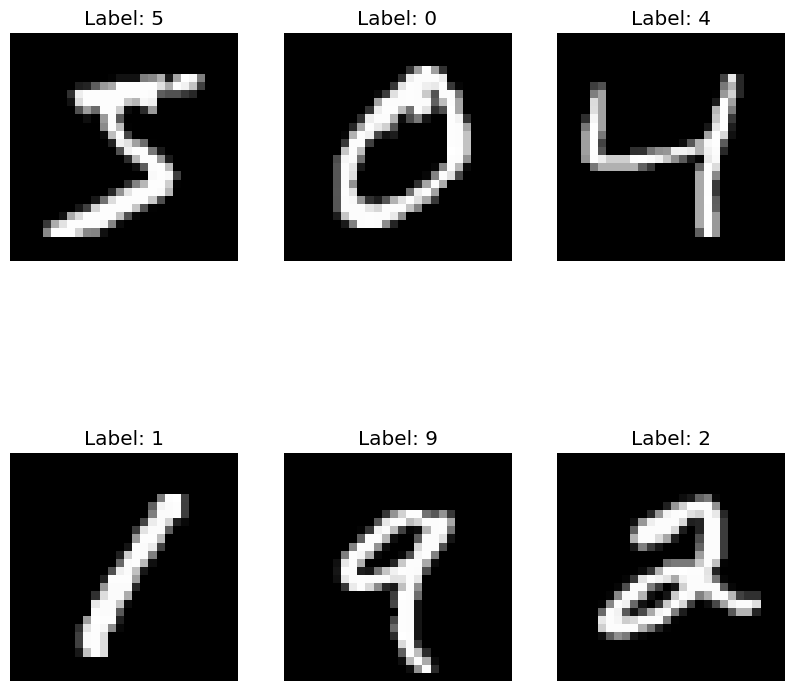

In [5]:
# Displaying six images
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

**Preprocessing data**

We need to do preprocessing by conducting normalization of pixel values from (0-255) into (0-1).

In [6]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

**Building deep learning model**

We will make a simple multi-layer perceptron model with 3 main layers.

* Input layer → Flatten 28×28 (Converting into 1D) → 784 features

* Hidden layer  → 128 neurons and activation function (ReLU)
* Output layer → 10 neurons, multiclass task (Softmax)

In [7]:
# Building simple MLP model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),    # Input layer. Converting 28x28 into vektor 1D
    keras.layers.Dense(128, activation='relu'),    # Hidden layer with 128 neurons, ReLU activation function
    keras.layers.Dense(10, activation = 'softmax') # Output layer with 10 class (0-9)
])

**Compiling model**

In [8]:
# Model compilation
# Model will be compiled using optimizer: adam and loss function: sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Displaying model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

We have 101770 parameters to train.

**Training model**

In [9]:
# Training model
# Model will be training with 10 epoch (number of iteration of all dataset)
historyMLP = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8778 - loss: 0.4306 - val_accuracy: 0.9560 - val_loss: 0.1471
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9638 - loss: 0.1241 - val_accuracy: 0.9665 - val_loss: 0.1070
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9760 - loss: 0.0797 - val_accuracy: 0.9745 - val_loss: 0.0789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9814 - loss: 0.0605 - val_accuracy: 0.9746 - val_loss: 0.0827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9767 - val_loss: 0.0740
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9900 - loss: 0.0336 - val_accuracy: 0.9767 - val_loss: 0.0700
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9921 - loss: 0.0269 - val_accuracy: 0.9772 - val_loss: 0.0765
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0212 

**Model Evaluation**

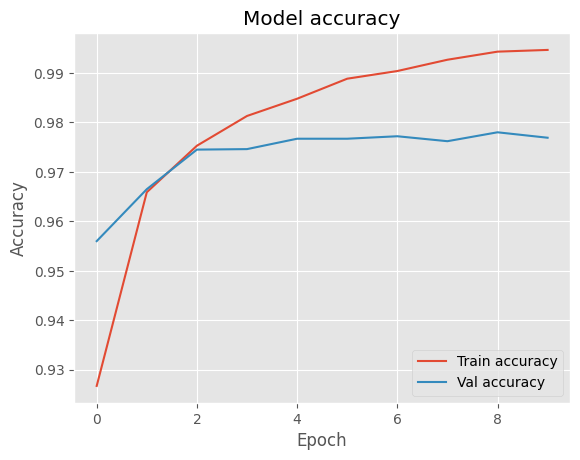

In [10]:
# Plotting accuracy
plt.plot(historyMLP.history['accuracy'])
plt.plot(historyMLP.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

The training accuracy increases steadily and reaches above 99%, while the validation accuracy stabilizes around 97–98%, indicating strong learning performance with a small generalization gap.

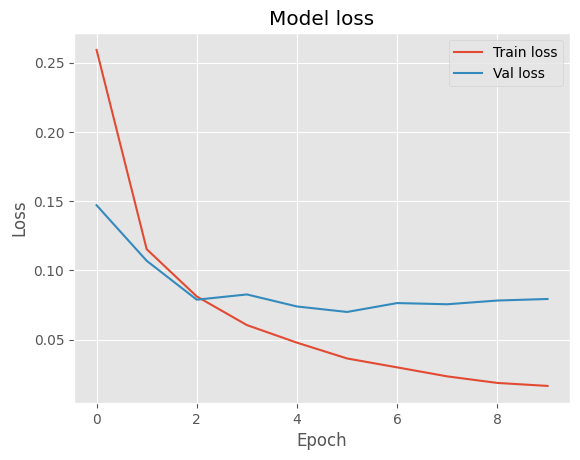

In [11]:
# Plotting loss
plt.plot(historyMLP.history['loss'])
plt.plot(historyMLP.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

**Predicting on test set**

We conduct model evaluation with test set.

In [12]:
# Evaluation model with test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9769 - loss: 0.0794

Test accuracy: 0.9768999814987183


By using 10 epochs, We get high accuracy of 97.7%. This confirm the model generalizes well to unseen data.

**Prediction simulation**

Now, we want to check the prediction result by ourselves. We order the model to predict images from the test set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


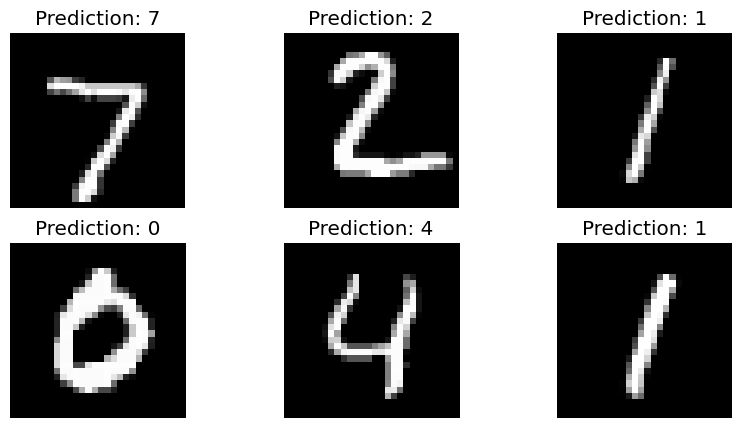

In [13]:
# Prediction simulation
prediction = model.predict(X_test)
#prediction[0]

# Displaying prediction
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(X_test[i], cmap='gray')
  plt.title(f'Prediction: {np.argmax(prediction[i])}')
  plt.axis('off')
plt.show()

The result of prediction seems quite accurate.

**Conclusion**

The MLP model achieves high classification performance on the MNIST dataset. This result shows that fully connected networks can effectively learn digit patterns. However, the slight gap between training and validation performance may suggest that further regularization or architectural improvements (e.g., CNN) could enhance generalization.